In [84]:
# Packages for data analysis
import pandas as pd
import numpy as np
import re

# Packages for visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Packages for training models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Packages for evaluating model accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Packages for hyperparameter optimisation
from sklearn.model_selection import GridSearchCV


In [85]:
# Import training dataset
df_train = pd.read_csv('train_set.csv')

# Import testing dataset
df_test = pd.read_csv('test_set.csv')

# Creat copy for EDA purposes
df_train_eda=df_train.copy()

In [86]:
#df_train.head(20)
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [87]:
df_train["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [88]:
df_train_eda[df_train_eda.duplicated(subset='text') == True].count()/len(df_train)*100

lang_id    9.248485
text       9.248485
dtype: float64

## Separating Independent and Dependent features

Now we can separate the dependent and independent variables, here text data is the independent variable and the language id is the dependent variable.

In [89]:
# independent variable
X = df_train["text"]

# dependent variable
y = df_train["lang_id"]

## Label Encoding

Our output variable, the name of languages is a categorical variable. For training the model we should have to convert it into a numerical form, so we are performing label encoding on that output variable. For this process, we are using LabelEncoder from sklearn.

In [90]:

le = LabelEncoder()
y = le.fit_transform(y)

## Text Preprocessing

This dataset may contains many unwanted symbols, numbers which will affect the quality of our model. So we should perform text preprocessing techniques.

In [91]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

## Bag of Words

As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [92]:
cv = CountVectorizer()
X = cv.fit_transform(data_list)
X.shape

(33000, 105196)

# Train Test Splitting

We preprocessed our input and output variable. The next step is to create the training set, for training the model and test set, for evaluating the test set. For this process, we are using a train test split.

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Model Training and Prediction

And we almost there, the model creation part. We are using the naive_bayes algorithm for our model creation. Later we are training the model using the training set.

In [94]:
# parameters to be tested for Logistic Regression
param_grid_lr = {'C':[0.01, 0.1, 1, 5, 10, 20, 50]}

In [95]:
lr = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, cv=10, n_jobs=-1, scoring='f1_weighted')

In [96]:
# Fitting the Naïve Bayes model
lr.fit(x_train, y_train)

C:\Users\MAVUSO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 20, 50]},
             scoring='f1_weighted')

In [97]:
best_param_lr = lr.best_params_
print(f'The best parameters: {best_param_lr}')

The best parameters: {'C': 50}


So we’ve trained our model using the training set. Now let’s predict the output for the test set.

In [98]:
y_pred = lr.predict(x_test)

# Model Evaluation

Now we can evaluate our model

In [99]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9966666666666667


The accuracy of the model is 1.0 which is very good and our model is performing well. Now let’s plot the confusion matrix using the seaborn heatmap.

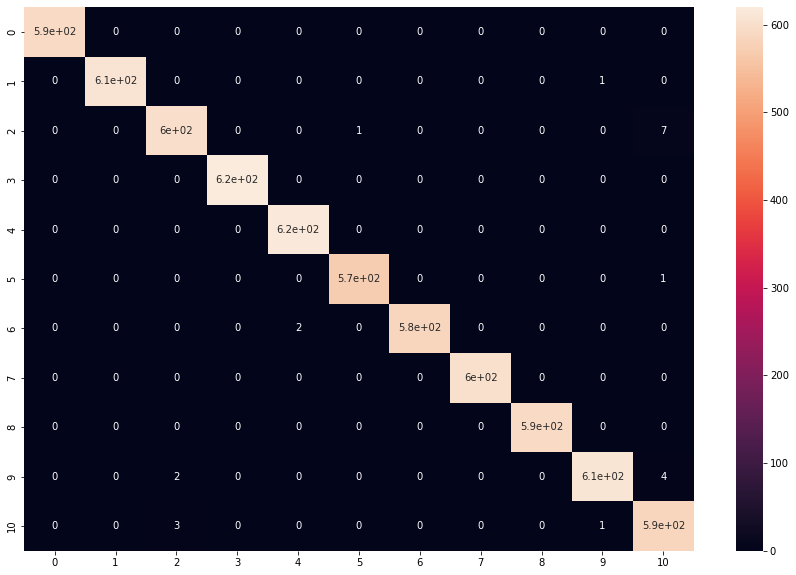

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

When looking into each language, almost all the predictions are right. And yes !! you are almost there !!

def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [101]:
# Make predictions
df_test.index += 1
x = cv.transform(df_test['text']).toarray()
predictions = nb.predict(x)
lang = le.inverse_transform(predictions)
Id = np.array(df_test.index)
names = ['lang_id']

# Create output dataframe
out = pd.DataFrame(lang, columns=names, index = Id)
out.index.name='index'

In [102]:
out.to_csv('language_test.csv', index =True)